In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif

 

# Sample data table (you should replace this with your own data)
data = pd.DataFrame({
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
})

 

# Convert categorical data to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Split data into features and target variable
X = data.drop('buys_computer_yes', axis=1)
y = data['buys_computer_yes']
 
# Calculate Information Gain for each feature
information_gain = mutual_info_classif(X, y)

# Find the feature with the highest Information Gain
root_node_feature_index = np.argmax(information_gain)
root_node_feature_name = X.columns[root_node_feature_index]

 

print(f"The root node feature selected is: {root_node_feature_name}")

The root node feature selected is: student_yes


In [4]:
import math

def calculate_entropy(labels):
    total_count = len(labels)
    unique_labels = set(labels)
    entropy = 0

    for label in unique_labels:
        label_count = labels.count(label)
        label_probability = label_count / total_count
        entropy -= label_probability * math.log2(label_probability)

    return entropy

data = {
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Calculate the entropy for each attribute/feature
entropies = {}
for attribute, values in data.items():
    entropy = calculate_entropy(values)
    entropies[attribute] = entropy

# Identify the first feature with the lowest entropy
first_feature = max(entropies, key=entropies.get)

print("Entropy at the root node:")
for attribute, entropy in entropies.items():
    print(f"{attribute}: {entropy}")

print("\nThe first feature at the root node is:", first_feature)

Entropy at the root node:
age: 1.5774062828523454
income: 1.5566567074628228
student: 1.0
credit_rating: 0.9852281360342516
buys_computer: 0.9402859586706311

The first feature at the root node is: age


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Prepare the data
data = {
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['age', 'income', 'student', 'credit_rating'])

X = df_encoded.drop('buys_computer', axis=1)
y = df_encoded['buys_computer']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree classifier
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get the depth of the constructed tree
depth = model.get_depth()
print("Depth:", depth)

Accuracy: 1.0
Depth: 4


In [9]:
# Convert categorical variables to numerical
df = pd.get_dummies(df, drop_first=True)

# Split the dataset into features and target variable
X = df.drop('buys_computer_yes', axis=1)
y = df['buys_computer_yes']

# Create the decision tree model
model = DecisionTreeClassifier()

# Fit the model to the data
model.fit(X, y)

# Print the root node
print(model.tree_.feature[0])

4


In [10]:
import matplotlib.pyplot as plt
from sklearn import tree

# Construct the decision tree model
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Visualize the decision tree
plt.figure(figsize=(70, 20))
tree.plot_tree(model, filled=True)
plt.show()

NameError: name 'Tr_X' is not defined

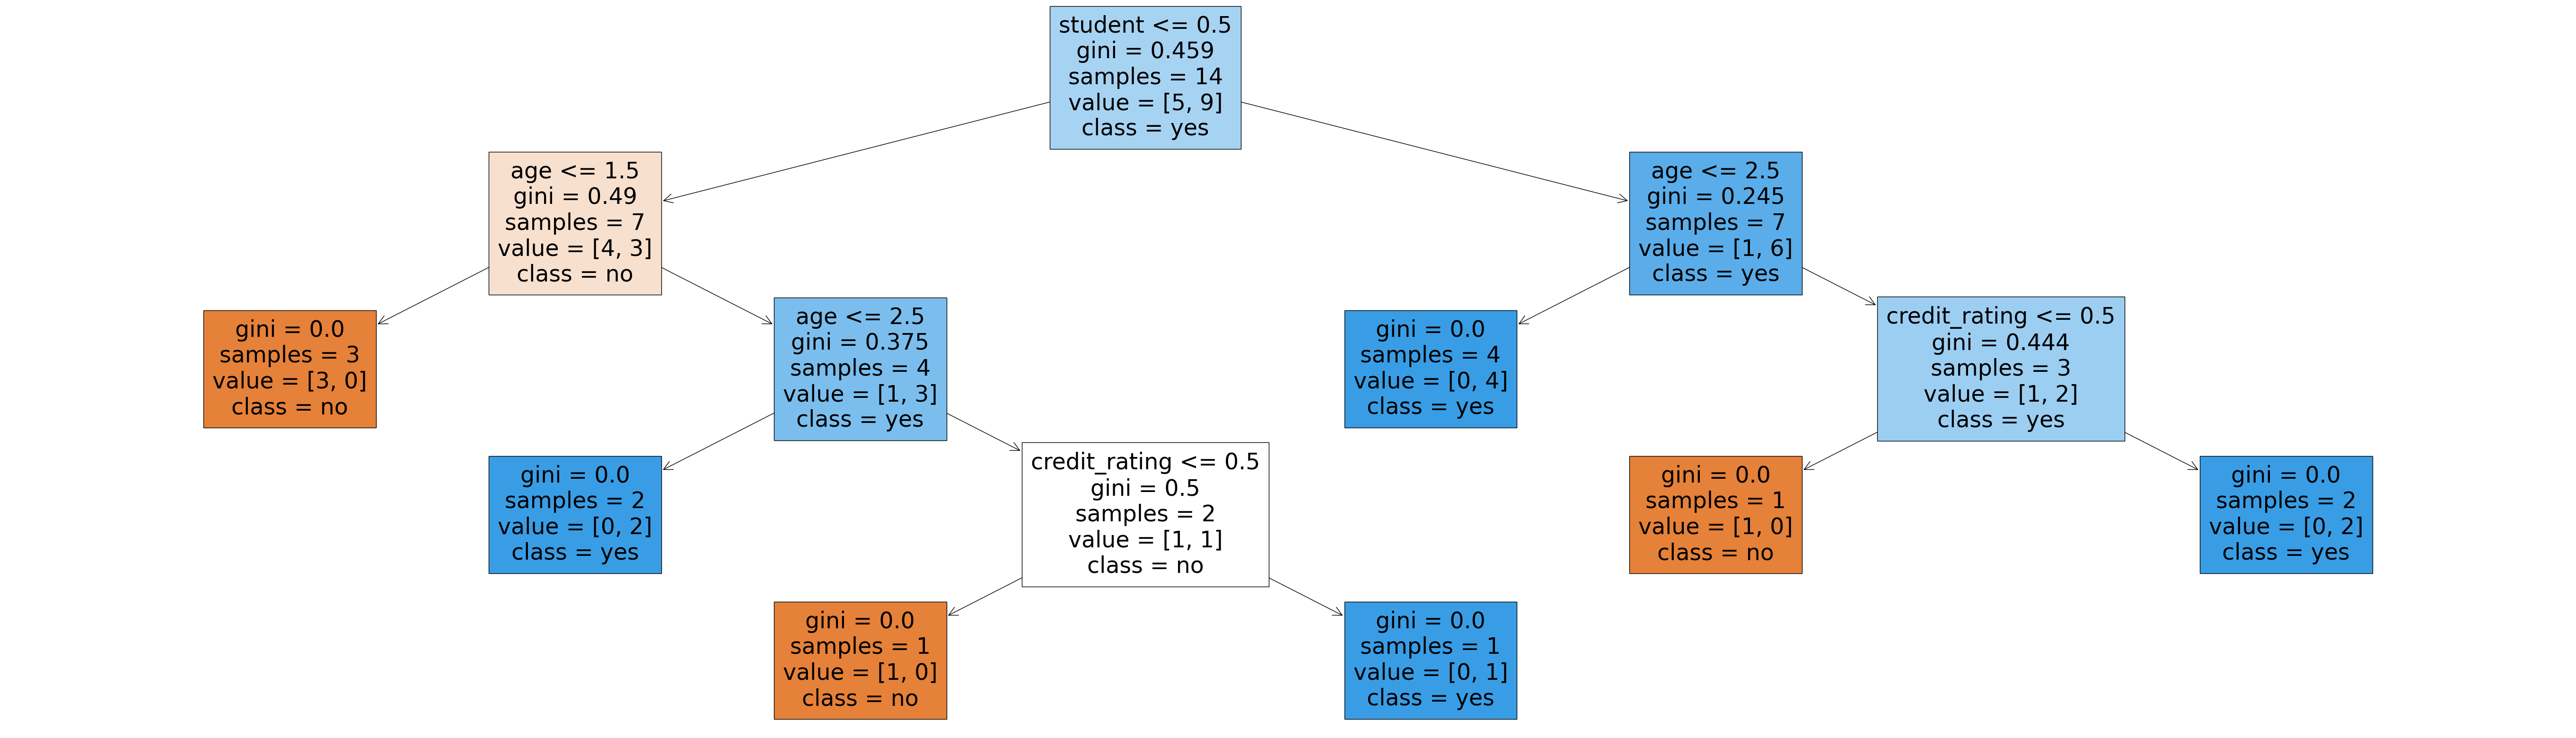

In [12]:
import matplotlib.pyplot as plt
from sklearn import tree

# Prepare the data
age = ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40']
income = ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium']
student = ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no']
credit_rating = ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent']
buys_computer = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']

# Convert categorical variables to numerical
age_num = [1, 1, 2, 3, 3, 3, 2, 1, 1, 3, 1, 2, 2, 3]
income_num = [2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1]
student_num = [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
credit_rating_num = [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0]
buys_computer_num = [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

# Combine the numerical features into a single feature matrix
X = list(zip(age_num, income_num, student_num, credit_rating_num))

# Combine the target variable into a single target vector
y = buys_computer_num

# Construct the decision tree model
model = tree.DecisionTreeClassifier()
model.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(70, 20))
tree.plot_tree(model, filled=True, feature_names=['age', 'income', 'student', 'credit_rating'], class_names=['no', 'yes'])
plt.show()

In [18]:
import pandas as pd

# Load the dataset
data = pd.read_csv("D:\extracted_features_charrec_dense7.csv")

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = data.drop('class_name', axis=1)
y = data['class_name']

# Split the dataset into training and test sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
model = DecisionTreeClassifier()

# Train the model on the training set
model.fit(Tr_X, Tr_y)

DecisionTreeClassifier()

In [20]:
# Calculate the accuracy for the training set
train_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy:", train_accuracy)

# Calculate the accuracy for the test set
test_accuracy = model.score(Te_X, Te_y)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.915680751173709
Test Set Accuracy: 0.6096096096096096


In [21]:
!pip install graphviz

from sklearn.tree import export_graphviz
import graphviz

# Export the Decision Tree as a DOT file
dot_data = export_graphviz(model, out_file=None, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True, special_characters=True)

# Render the DOT file
graph = graphviz.Source(dot_data)
graph.render("Decision Tree")

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     --------------------------------- ---- 41.0/47.0 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 593.5 kB/s eta 0:00:00


TypeError: can only concatenate str (not "numpy.int64") to str